<a href="https://www.kaggle.com/code/paragghatage/classification?scriptVersionId=257193375" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mnist  = load_digits()
mnist.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
digits_df  = pd.DataFrame(mnist.data)
digits_df
digits_df.head()
X = digits_df

In [4]:
target_df  = pd.DataFrame(mnist.target)
target_df
type(target_df[0])
y = np.array(target_df)


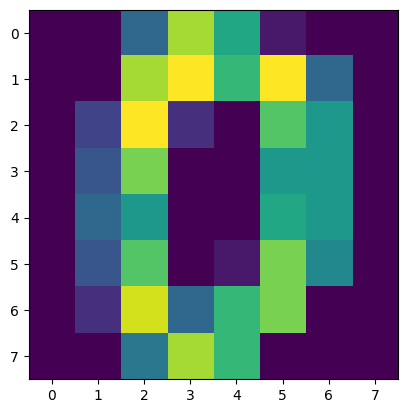

In [5]:
plt.imshow(mnist.images[0]);

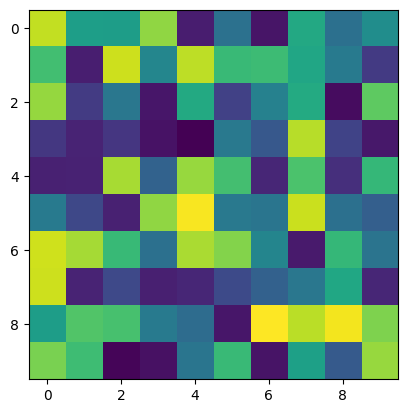

In [6]:
a = np.random.random((10,10))
plt.imshow(a)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


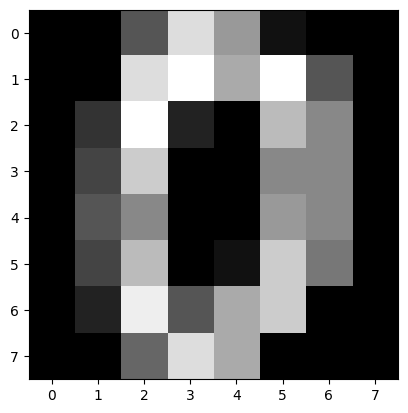

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Take the first digit
first_digit = digits_df.iloc[0].values.reshape(8, 8)

print(first_digit)  # Now you see it as an 8x8 grid

plt.imshow(first_digit, cmap="gray")


In [8]:
import matplotlib.image as img
from PIL import Image


(512, 512, 4)

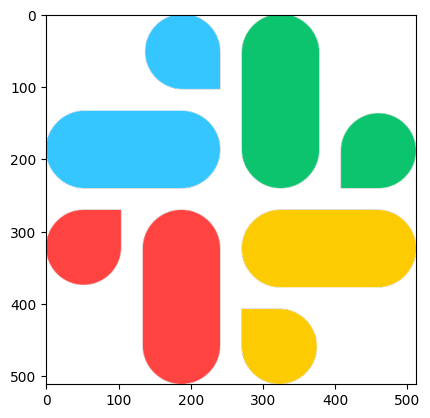

In [9]:
# image = img.imread("/kaggle/input/slack-image/slack.png")
pillow_img = Image.open("/kaggle/input/slack-image/slack.png")
# image
# plt.imshow(image)
pillow_img
plt.imshow(pillow_img)
np_img = np.array(pillow_img)
np_img.shape
# here, each pixel is [R, G, B, Alpha]
# alpha is transperency of each pixel - 0 to 255

## splitting into train and test

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42,shuffle=True)

## Choosing and training the classifier

In [11]:
from sklearn.linear_model import SGDClassifier # Linear Gradient descent classifier
sgd = SGDClassifier(random_state = 42)

In [12]:
sgd_model = sgd.fit(X_train,y_train)

sgd_model

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(random_state=42)

In [13]:

sgd_pred = sgd_model.predict(X_train)
sgd_pred

array([6, 0, 0, ..., 2, 7, 1])

## K - Fold

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [15]:
y_train_pred = cross_val_predict(sgd_model,X_train,y_train,cv=5)
confusion_matrix(y_train,y_train_pred)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

array([[144,   0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0, 130,   1,   1,   0,   0,   1,   0,  17,   4],
       [  0,   1, 139,   2,   0,   0,   0,   0,   2,   0],
       [  0,   0,   1, 141,   0,   0,   0,   1,   5,   1],
       [  0,   4,   0,   0, 129,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0, 132,   0,   0,   1,   2],
       [  0,   1,   0,   0,   0,   0, 144,   0,   1,   0],
       [  0,   0,   0,   0,   1,   0,   0, 141,   2,   1],
       [  0,  10,   0,   1,   0,   0,   0,   1, 132,   0],
       [  0,   3,   0,   3,   0,   2,   0,   1,   2, 129]])

In [16]:
from sklearn.metrics import precision_score, recall_score

In [17]:
precision = precision_score(y_train,y_train_pred,average="macro")
print("precision for each class:",precision)
recall = recall_score(y_train,y_train_pred,average="macro")
print("recall for each class:",recall)


precision for each class: 0.9498026028817176
recall for each class: 0.9478989529436731


## F1 Score

In [18]:
from sklearn.metrics import f1_score

f1 = f1_score(y_train,y_train_pred,average="macro")
f1

0.948436914080413